# Credit Card Fraud

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\mbadi\\Desktop\\Kaggle_Projects\\creditcard.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

The observations of this data set are individual credit card transactions. The target variable is whether or not the transaction was fraudulent (True for fraud, False for legitimate). Variables V1-V28 are in fact principal components. The goal is to conduct classification- whether we can predict that a given credit card transaction is fraud or not. 

First, the data is highly imbalanced in favor of non-fraudulent transactions. One remedy is to take a random subset of the majority class that is the same size as the minority class and analyze that unioned dataset. To this end, we'll employ Scikit Learn's Stratified Shuffle Split to establish the train/test datasets so that the True/False ratio of the target variable is the same for both. Putting the test set aside, we'll then balance out the train dataset as specified above. Once the data has been preprocessed, we'll have the green light to deploy an ensemble of classifiers to maximize recall. We favor recall over precision because we'd rather capture every truly fraudulent case, even if we misidentify truly non-fraudulent cases in the process. 

Regarding the variables, we'll drop "Time" and normalize "Amount". 

## Data Preprocessing

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.drop("Time", axis=1, inplace=True)

In [10]:
from sklearn.preprocessing import StandardScaler

In [17]:
data["Amount_Norm"] = StandardScaler().fit_transform(data["Amount"].to_numpy().reshape(-1,1))

In [22]:
data.drop("Amount", axis=1, inplace=True)

In [23]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Norm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Now we proceed to split the data into train/test sets. 

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

In [25]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [26]:
for train_index, test_index in split.split(data, data["Class"]):
    data_train = data.loc[train_index]
    data_test = data.loc[test_index]

To verify that the test/train sets have the same True/False ratio in Class, let's take value counts...

In [27]:
data_train["Class"].value_counts()/len(data_train["Class"])

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [28]:
data_test["Class"].value_counts()/len(data_test["Class"])

0    0.99828
1    0.00172
Name: Class, dtype: float64

...and indeed they do (close enough).

Now we'll need to balance the train set. Balancing is necessary so that the ML algorithms don't attribute to underlying cause what can be attributed to sampling. 

We won't balance the test set, since this imbalance is characteristic of the reality of credit card fraud. The following code pertains to the train set. 

In [41]:
fraud_count = len(data_train[data_train.Class==True])
fraud_indices = np.array(data_train[data_train.Class==True].index)
normal_indices = np.array(data_train[data_train.Class==False].index)

In [43]:
random_normal_indices = np.random.choice(normal_indices, fraud_count, replace=False)
random_normal_indices = np.array(random_normal_indices)

In [44]:
balanced_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

In [52]:
balanced_sample_data = data_train.loc[balanced_sample_indices]

In [56]:
balanced_sample_data["Class"].value_counts()/len(balanced_sample_data["Class"])

1    0.5
0    0.5
Name: Class, dtype: float64

Now our train data set is balanced.

In [57]:
balanced_sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 42887 to 106071
Data columns (total 30 columns):
V1             788 non-null float64
V2             788 non-null float64
V3             788 non-null float64
V4             788 non-null float64
V5             788 non-null float64
V6             788 non-null float64
V7             788 non-null float64
V8             788 non-null float64
V9             788 non-null float64
V10            788 non-null float64
V11            788 non-null float64
V12            788 non-null float64
V13            788 non-null float64
V14            788 non-null float64
V15            788 non-null float64
V16            788 non-null float64
V17            788 non-null float64
V18            788 non-null float64
V19            788 non-null float64
V20            788 non-null float64
V21            788 non-null float64
V22            788 non-null float64
V23            788 non-null float64
V24            788 non-null float64
V25            788 non-n

In [59]:
X_train = balanced_sample_data.drop("Class", axis=1, inplace=False).copy()
y_train = pd.DataFrame(balanced_sample_data["Class"])

In addition, the data is also normalized and there are no missing values. We can proceed to train ML algorithms.

The only problem is that we've drastically reduced the number of observations, which means we risk falling prey to the "curse of dimensionality". In short, we need to decide on a handful of variables that most influence our target variable.

Let's see how the variables correlate with "Class".

In [63]:
corr = data_train.corr() #computes correlation matrix

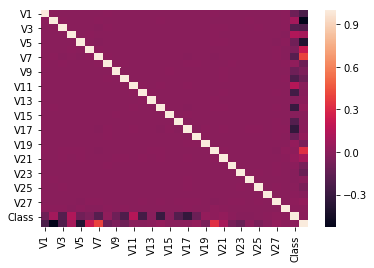

In [64]:
sns.heatmap(corr)

We see that V12, V14, and V17 have relatively high negative correlation with the target variable. Let's consider training a model using these three predictors.

## ML Algorithms

We'll first implement logistic regression in conjunction with a cross-validator. 

In [73]:
chosen_cols = ["V12","V14","V17"]

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression()

In [92]:
scores = cross_val_score(lr, X_train[chosen_cols], y_train, cv=4)

In [93]:
(scores.mean(), scores.std())

(0.9301819212533498, 0.008460924671141542)

The logistic regressor yields decent accuracy. Let's test another ML algorithm to be sure that the logistic regressor is not overfitting our data. Next we'll try a support vector machine classifier.

In [94]:
from sklearn.svm import SVC

In [96]:
svc = SVC() #we initialize a naive classifier, to then fine-tune as we please

In [99]:
scores1 = cross_val_score(svc, X_train[chosen_cols], y_train, cv=4)

In [100]:
(scores1.mean(), scores1.std())

(0.9403602350030922, 0.007429857488273562)

The SVM classifier slightly outperforms the logistic regressor. It's likely that we can further improve this performance by fine-tuning the SVM's hyperparameters. 

To this end, we'll use ScikitLearn's Grid Search CV, which iterates across a given hyperparameter space.

In [106]:
parameters = {'kernel':('linear','rbf'), 'C':[0.1, 1, 10, 100]}

In [107]:
svc = SVC()
clf = GridSearchCV(svc, parameters, cv=5)

In [109]:
clf.fit(X_train[chosen_cols], y_train)

In [113]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [114]:
svc = clf.best_estimator_

In [117]:
optimum_score = cross_val_score(svc, X_train[chosen_cols], y_train, cv=4)

In [118]:
(optimum_score.mean(), optimum_score.std())

(0.9403602350030922, 0.007429857488273562)

The fine-tuning procedure didn't much improve performance. Let's test this svm on the test data. 

In [120]:
X_test = data_test[chosen_cols]
y_test = data_test["Class"]

In [122]:
accuracy_score(y_test, svc.predict(X_test))

0.9681717636318949

This looks like an outstanding score, and it is. The problem is that since the test set is drastically imbalanced, this score may not reflect the true accuracy of our model, in that the 3% of the data that is misclassified could contain more fraudulent cases than we're comfortable with. Let's balance the test set and try this again.

We'll repeat the resampling procedure as in the Data Preprocessing section, but this time with the test set.

In [129]:
frd_count = len(data_test[data_test["Class"]==True])
frd_indices = np.array(data_test[data_test.Class==True].index)
norm_indices = np.array(data_test[data_test.Class==False].index)

In [130]:
rand_norm_indices = np.random.choice(norm_indices, frd_count, replace=False)
rand_norm_indices = np.array(rand_norm_indices)

In [131]:
bal_indices = np.concatenate([frd_indices, rand_norm_indices])

In [132]:
bal_test = data_test.loc[bal_indices]

In [138]:
bal_test["Class"].value_counts()/len(bal_test["Class"])

1    0.5
0    0.5
Name: Class, dtype: float64

Now we have a balanced test set. All that's left is to use it to check our model's performance.

In [139]:
X_test_bal = bal_test[chosen_cols]
y_test_bal = bal_test["Class"]

In [140]:
accuracy_score(y_test_bal, svc.predict(X_test_bal))

0.9387755102040817

Though balancing the test set caused a noticeable drop in accuracy, our model still performs at almost 94%.

For future reference, the predictive ability of the model can be improved if it's used as part of an ensemble. Such an ensemble in this case might consist of the SVM, the logistic regressor, and a decision tree. 

# Citations:

Thank you to Kaggle and to the Scikit Learn team.

Link to kaggle dataset:
https://www.kaggle.com/mlg-ulb/creditcardfraud